---
title: "`Bagging` | 의사결정나무"
author: "강신성"
date: "2023-11-17"
categories: [tree]
---




> `ensemble`의 `Bagging`을 이용해보자!

## 1. 라이브러리 imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.tree
import sklearn.ensemble

import matplotlib.animation
import IPython

#-#
import warnings
warnings.filterwarnings('ignore')

## 2. 기본 의사결정나무로 데이터 적합

`-` 기온에 따른 아이스크림 판매량 데이터...

In [2]:
np.random.seed(43052)
temp = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/temp.csv').iloc[:,3].to_numpy()[:80]
temp.sort()
eps = np.random.randn(80)*3 # 오차
icecream_sales = 20 + temp * 2.5 + eps 
df_train = pd.DataFrame({'temp':temp,'sales':icecream_sales})
df_train

,temp,sales
0,-4.1,10.900261
1,-3.7,14.002524
2,-3.0,15.928335
3,-1.3,17.673681
4,-0.5,19.463362
...,...,...
75,9.7,50.813741
76,10.3,42.304739
77,10.6,45.662019
78,12.1,48.739157


In [3]:
## step 1
X = df_train[['temp']]
y = df_train['sales']

## step 2
predictr = sklearn.tree.DecisionTreeRegressor()

## step 3
predictr.fit(X, y)

DecisionTreeRegressor()

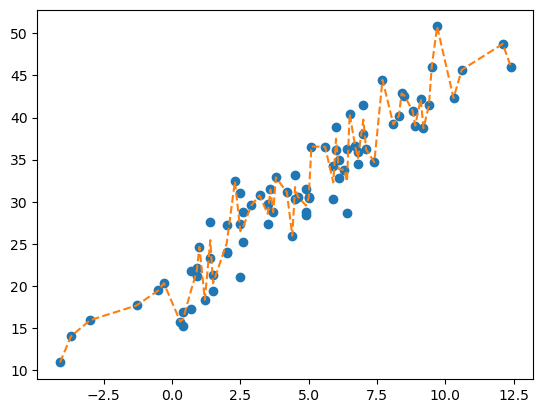

In [4]:
plt.plot(X, y, 'o')
plt.plot(X, predictr.predict(X), '--')

> 우리가 지금까지 먹어왔던 기본적인 `DecisionTreeRegressor()`이다. 오차항까지 그대로 따라가는 모습이 참으로 안타깝다...

## 3. 배깅

`-` 같은 자료를 배깅을 이용해 적합한다면...

In [5]:
## step 1
X = df_train[['temp']]
y = df_train['sales']

## step 2
predictr = sklearn.ensemble.BaggingRegressor()

## step 3
predictr.fit(X, y)

BaggingRegressor()

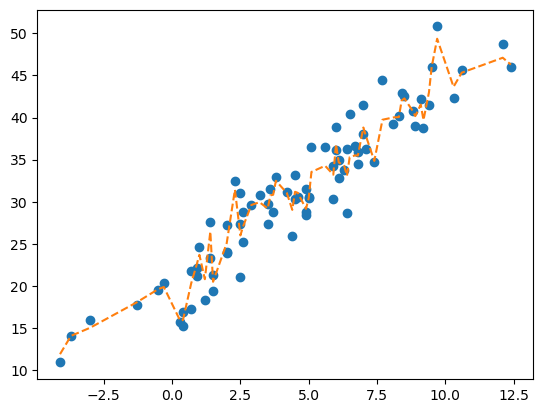

In [6]:
plt.plot(X, y, 'o')
plt.plot(X, predictr.predict(X), '--')
plt.show()

> 뭔가 무지성적인 오차항 추종이 옅어졌다...?!

## 4. 배깅의 원리에 대한 분석

### **A. 기본원리**
---



`-` 알고리즘

1. n개의 샘플에서 n개를 무작위로 복원추출한다.
2. 1번에서 뽑힌 샘플들을 이용하여 `tree`를 적합한다.
3. 상기 과정을 10번 반복하고, 10개의 `tree`의 평균값을 `yhat`으로 택한다.

### **B. `plot_tree` 체크**
---




`-` 10개의 트리들의 리스트를 찾으려면?

In [7]:
trees = predictr.estimators_
trees

[DecisionTreeRegressor(random_state=1644635363),
 DecisionTreeRegressor(random_state=1304269235),
 DecisionTreeRegressor(random_state=1794000214),
 DecisionTreeRegressor(random_state=1273087880),
 DecisionTreeRegressor(random_state=995922005),
 DecisionTreeRegressor(random_state=1372517728),
 DecisionTreeRegressor(random_state=1087222928),
 DecisionTreeRegressor(random_state=3687756),
 DecisionTreeRegressor(random_state=1772778467),
 DecisionTreeRegressor(random_state=92158766)]

> 정말 말그대로 표본마다 각각 `DecisionTreeRegressor()`로 적합해준 것이다.

`-` 재표본의 데이터셋을 찾으려면?

In [8]:
predictr.estimators_samples_

[array([19, 10, 25, 29, 50,  7, 46, 31, 10, 39, 78, 14, 54, 79, 28, 35, 73,
         0, 74, 72, 66, 36, 55, 24, 41, 11, 68, 65, 71, 36, 54, 41, 76, 34,
         0, 59,  5,  7, 67, 61, 64, 21, 27, 26, 43, 55, 49, 23, 29, 27, 41,
        14, 58,  5, 12, 40, 12, 38,  8, 19, 63,  4, 35, 75, 64,  9, 69, 17,
        32, 15, 60, 55, 18, 55, 22, 73, 28, 48, 57, 63]),
 array([51, 70, 43, 33, 42, 76, 13, 32, 39,  6, 44, 32, 78, 38, 54,  4, 54,
        78, 75,  1, 59, 58, 26, 41, 21, 45, 45, 63, 15,  0, 45, 43, 24, 50,
        77, 26, 51, 53, 38,  6, 22,  5, 10, 32, 76,  7, 46, 70, 40, 28, 64,
        69, 32, 49,  1,  1, 37,  7, 29, 29, 22,  1, 50, 56, 44, 52,  0, 30,
        32, 73, 53, 69, 78, 46, 12,  3, 18, 60, 41, 70]),
 array([55,  8,  0, 71, 14, 74, 10,  7, 58, 10,  0, 50, 23, 61, 36, 66, 66,
        52, 17,  6, 36,  3, 55, 13, 41,  5, 77, 21, 31, 14, 19, 59,  3, 25,
        79, 39, 18, 24, 55,  5, 57, 19, 40, 15,  3, 75, 36, 25, 22, 13, 53,
        55, 71, 28,  7,  1, 68, 48, 49, 77, 34, 

> 길이가 80인 `array`들의 리스트로 나타난다. 이것들은 데이터의 인덱스를 의미하는 것이므로...

`-` 첫번째 트리(`predictr.estimators_[0]`) 재현

In [9]:
## 호출하기 쉽도록 변수들을 어레이로 바꿔줌
X_arr = np.array(X)
y_arr = np.array(y)

## 적합
tree = sklearn.tree.DecisionTreeRegressor()
tree.fit(X_arr[predictr.estimators_samples_[0]], y_arr[predictr.estimators_samples_[0]])

DecisionTreeRegressor()

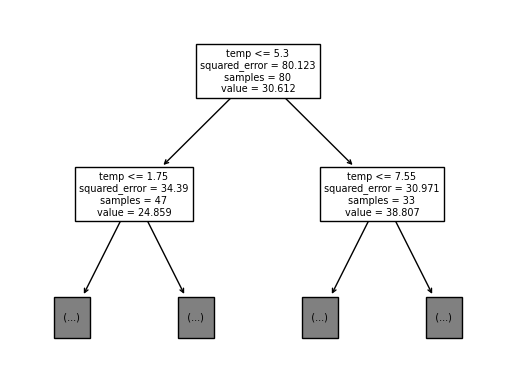

In [10]:
sklearn.tree.plot_tree(
    tree,
    max_depth = 1,
    feature_names = X.columns.to_list()
);

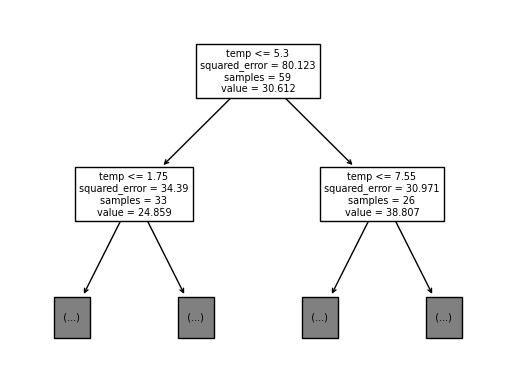

In [11]:
## 작업결과
sklearn.tree.plot_tree(
    predictr.estimators_[0],
    feature_names = X.columns.to_list(),
    max_depth = 1
);

실제 작업된 결과와 동일한 것을 알 수 있다.

> 다만, `Bagging`에서는 `.fit(sample_weight)`를 지정하여 가중치로 데이터의 수를 설정하기 때문에 `samples`의 사이즈는 다르다.

`-` `tree`와 `predictr`의 트리플랏 비교 (고정된 `i`)

Text(0.5, 1.0, 'tree')

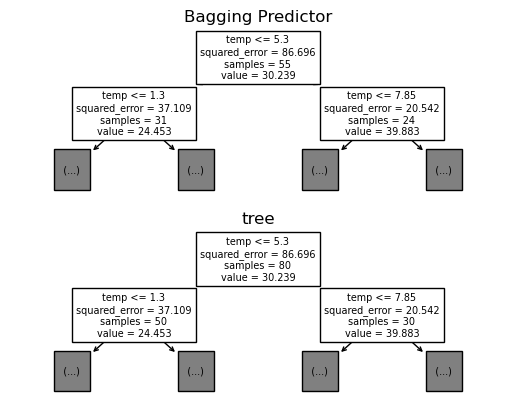

In [12]:
i = 4

fig, ax = plt.subplots(2,1)

sklearn.tree.plot_tree(
    predictr.estimators_[i],
    feature_names = X.columns.to_list(),
    max_depth = 1,
    ax = ax[0]
)
ax[0].set_title('Bagging Predictor')

tree = sklearn.tree.DecisionTreeRegressor()
tree.fit(X_arr[predictr.estimators_samples_[i]], y_arr[predictr.estimators_samples_[i]])
sklearn.tree.plot_tree(
    tree,
    feature_names = X.columns.to_list(),
    max_depth = 1,
    ax = ax[1]
)
ax[1].set_title('tree')

`-` `tree`와 `predictr`간 트리플랏 비교(애니메이션)

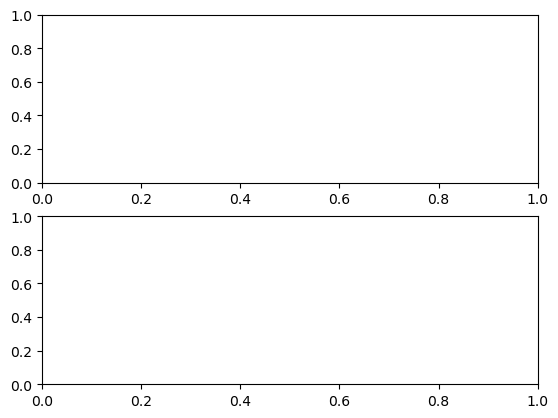

In [13]:
fig, ax = plt.subplots(2, 1)

In [14]:
def func(frame) :
    ax[0].clear()  ## 배깅으로 적합한 predictr
    sklearn.tree.plot_tree(
        predictr.estimators_[frame],
        feature_names = X.columns.to_list(),
        max_depth = 1,
        ax = ax[0]
    )
    ax[0].set_title('Bagging Predictor')

    ax[1].clear()  ## 기본 의사결정나무로 적합한 predictr
    tree = sklearn.tree.DecisionTreeRegressor()
    tree.fit(X_arr[predictr.estimators_samples_[frame]], y_arr[predictr.estimators_samples_[frame]])
    sklearn.tree.plot_tree(
        tree,
        feature_names = X.columns.to_list(),
        max_depth = 1,
        ax = ax[1]
    )
    ax[1].set_title('Pure Tree')

In [15]:
ani = matplotlib.animation.FuncAnimation(
    fig,
    func,
    frames = 10
)

display(IPython.display.HTML(ani.to_jshtml()))

> 모든 프레임의 위 아래 값이 samples의 값만을 제외하고 동일한 모습이다.

## **C. Resampling + Fit**
---




`-` `i`가 fixed일 때...

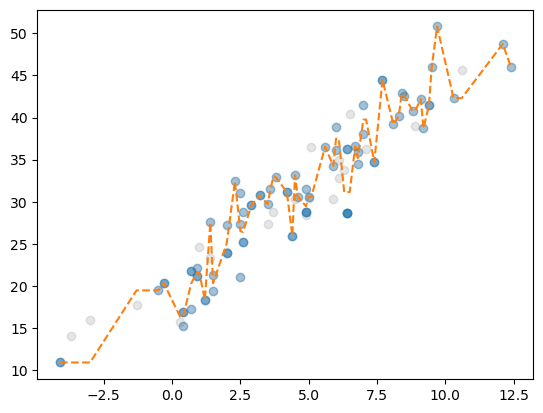

In [16]:
samples = predictr.estimators_samples_
trees = [sklearn.tree.DecisionTreeRegressor() for i in range(len(predictr.estimators_))]
for i in range(len(predictr.estimators_)) :
    trees[i].fit(X_arr[predictr.estimators_samples_[i]], y_arr[predictr.estimators_samples_[i]])

i = 0
plt.plot(X, y, 'o', alpha = 0.2, color = 'grey')  ## 실제값
plt.plot(X_arr[samples[i]], y_arr[samples[i]], 'o', alpha = 0.33)  ## 리샘플링된 값, true값과 겹침
plt.plot(X, trees[i].predict(X), '--')  ## X에 대한 예측값

> 어떤 샘플이 뽑히냐에 따라 (`i`의 값이 달라질 때마다) 적합되는 모양이 달라진다.

`-` 달라지는 양상을 애니메이션으로 시각화

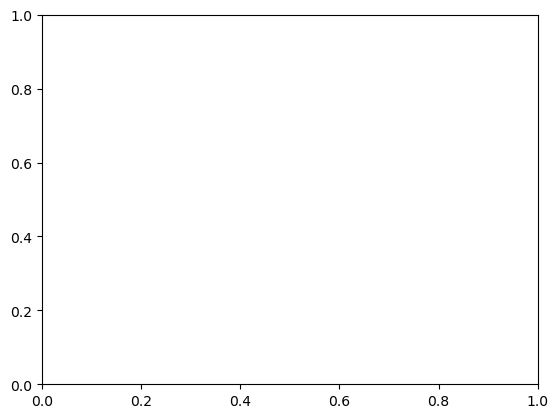

In [17]:
fig, ax = plt.subplots(1)

In [18]:
def func(frame) :
    ax.clear()
    ax.plot(X, y, 'o', alpha = 0.2, color = 'grey', label = 'True')
    ax.plot(X_arr[samples[frame]], y_arr[samples[frame]], 'o', alpha = 0.3, label = 'Resampled')
    ax.plot(X, trees[frame].predict(X), '--', label = 'Prediction')
    ax.legend()

In [19]:
ani = matplotlib.animation.FuncAnimation(
    fig,
    func,
    frames = 10
)

display(IPython.display.HTML(ani.to_jshtml()))

### **D. 앙상블결과 재현**
---




`-` 최종 결과물(손으로...)

In [20]:
predictr.predict(X)

array([11.88782962, 14.05941305, 15.02231867, 18.03161729, 19.62619066,
       19.86214551, 15.84293717, 15.95940294, 15.95940294, 20.30137042,
       20.30137042, 22.51278676, 22.51278676, 23.68899036, 20.7954938 ,
       26.45727462, 26.45727462, 20.48421278, 20.48421278, 25.08188452,
       25.08188452, 25.08188452, 31.42611771, 25.99393577, 25.99393577,
       25.99393577, 27.05912187, 27.05912187, 29.60439358, 29.94005816,
       29.18760881, 29.18760881, 30.75340115, 30.82608162, 32.48384789,
       31.03678302, 29.02978839, 31.17487146, 31.17487146, 31.05349512,
       29.147739  , 29.147739  , 29.147739  , 30.40843883, 30.40843883,
       33.53154643, 34.26668831, 33.20982041, 33.20982041, 36.82818648,
       36.82818648, 34.66545508, 34.66545508, 34.24047203, 33.0829342 ,
       33.0829342 , 35.29894866, 35.50366771, 35.47938512, 35.47938512,
       38.8116606 , 38.8116606 , 37.74794717, 34.84063828, 39.73515434,
       40.01130524, 40.05274675, 41.9980937 , 42.26869452, 40.81

In [21]:
np.stack([tree.predict(X) for tree in predictr.estimators_]).shape, np.array([tree.predict(X) for tree in predictr.estimators_]).mean(axis = 0).shape

((10, 80), (80,))

In [22]:
np.array([tree.predict(X) for tree in predictr.estimators_]).mean(axis = 0)  ## 행마다 평균을 내어 하나의 어레이로 만듦

array([11.88782962, 14.05941305, 15.02231867, 18.03161729, 19.62619066,
       19.86214551, 15.84293717, 15.95940294, 15.95940294, 20.30137042,
       20.30137042, 22.51278676, 22.51278676, 23.68899036, 20.7954938 ,
       26.45727462, 26.45727462, 20.48421278, 20.48421278, 25.08188452,
       25.08188452, 25.08188452, 31.42611771, 25.99393577, 25.99393577,
       25.99393577, 27.05912187, 27.05912187, 29.60439358, 29.94005816,
       29.18760881, 29.18760881, 30.75340115, 30.82608162, 32.48384789,
       31.03678302, 29.02978839, 31.17487146, 31.17487146, 31.05349512,
       29.147739  , 29.147739  , 29.147739  , 30.40843883, 30.40843883,
       33.53154643, 34.26668831, 33.20982041, 33.20982041, 36.82818648,
       36.82818648, 34.66545508, 34.66545508, 34.24047203, 33.0829342 ,
       33.0829342 , 35.29894866, 35.50366771, 35.47938512, 35.47938512,
       38.8116606 , 38.8116606 , 37.74794717, 34.84063828, 39.73515434,
       40.01130524, 40.05274675, 41.9980937 , 42.26869452, 40.81

> 위에서의 예측은 **개별 트리의 예측값들의 평균**으로 정리되었다는 것을 알 수 있다.

`-` 최종결과물 (코드로 정리)

In [23]:
def ensemble(trees, i=None) :
    if i is None :
        i = len(trees)
    yhat = np.array([tree.predict(X) for tree in predictr.estimators_[:i+1]]).mean(axis = 0)
    return yhat

> `i`의 의미... 몇 번째 트리까지만 결과값을 산출하는 데에 이용하겠음... 디폴트는 전부 다...

`-` 0번 트리의 예측값 평균만 활용

In [24]:
ensemble(trees, 0)  ## 0번 트리만 적용

array([10.90026146, 10.90026146, 10.90026146, 19.46336233, 19.46336233,
       20.31785349, 16.3076088 , 16.3076088 , 16.3076088 , 20.27763408,
       20.27763408, 21.52796629, 21.52796629, 21.52796629, 18.34698175,
       27.5369675 , 27.5369675 , 20.30881248, 20.30881248, 25.04963215,
       25.04963215, 25.04963215, 32.42440294, 26.49340711, 26.49340711,
       26.49340711, 26.40925726, 26.40925726, 29.55903213, 30.75418385,
       29.70592592, 29.70592592, 31.45007539, 32.89828946, 32.89828946,
       31.12503261, 25.9552363 , 33.12203011, 33.12203011, 30.60313283,
       29.45886461, 29.45886461, 29.45886461, 30.60789344, 30.60789344,
       30.60789344, 36.5245913 , 34.24458444, 34.24458444, 37.4829917 ,
       37.4829917 , 37.4829917 , 37.4829917 , 31.13974993, 31.13974993,
       31.13974993, 31.13974993, 36.58400962, 35.1723381 , 35.1723381 ,
       39.75311187, 39.75311187, 39.75311187, 34.68877582, 44.47780794,
       39.1744058 , 40.19626989, 42.86734269, 42.60143843, 40.80

`-` 9번 트리의 예측값까지 활용(전부 다)

In [25]:
ensemble(trees, 9)

array([11.88782962, 14.05941305, 15.02231867, 18.03161729, 19.62619066,
       19.86214551, 15.84293717, 15.95940294, 15.95940294, 20.30137042,
       20.30137042, 22.51278676, 22.51278676, 23.68899036, 20.7954938 ,
       26.45727462, 26.45727462, 20.48421278, 20.48421278, 25.08188452,
       25.08188452, 25.08188452, 31.42611771, 25.99393577, 25.99393577,
       25.99393577, 27.05912187, 27.05912187, 29.60439358, 29.94005816,
       29.18760881, 29.18760881, 30.75340115, 30.82608162, 32.48384789,
       31.03678302, 29.02978839, 31.17487146, 31.17487146, 31.05349512,
       29.147739  , 29.147739  , 29.147739  , 30.40843883, 30.40843883,
       33.53154643, 34.26668831, 33.20982041, 33.20982041, 36.82818648,
       36.82818648, 34.66545508, 34.66545508, 34.24047203, 33.0829342 ,
       33.0829342 , 35.29894866, 35.50366771, 35.47938512, 35.47938512,
       38.8116606 , 38.8116606 , 37.74794717, 34.84063828, 39.73515434,
       40.01130524, 40.05274675, 41.9980937 , 42.26869452, 40.81

`-` 전부 다 활용

In [26]:
ensemble(trees)

array([11.88782962, 14.05941305, 15.02231867, 18.03161729, 19.62619066,
       19.86214551, 15.84293717, 15.95940294, 15.95940294, 20.30137042,
       20.30137042, 22.51278676, 22.51278676, 23.68899036, 20.7954938 ,
       26.45727462, 26.45727462, 20.48421278, 20.48421278, 25.08188452,
       25.08188452, 25.08188452, 31.42611771, 25.99393577, 25.99393577,
       25.99393577, 27.05912187, 27.05912187, 29.60439358, 29.94005816,
       29.18760881, 29.18760881, 30.75340115, 30.82608162, 32.48384789,
       31.03678302, 29.02978839, 31.17487146, 31.17487146, 31.05349512,
       29.147739  , 29.147739  , 29.147739  , 30.40843883, 30.40843883,
       33.53154643, 34.26668831, 33.20982041, 33.20982041, 36.82818648,
       36.82818648, 34.66545508, 34.66545508, 34.24047203, 33.0829342 ,
       33.0829342 , 35.29894866, 35.50366771, 35.47938512, 35.47938512,
       38.8116606 , 38.8116606 , 37.74794717, 34.84063828, 39.73515434,
       40.01130524, 40.05274675, 41.9980937 , 42.26869452, 40.81

### **E. 학습과정(steps) 시각화**
---




`-` 고정된 `i`

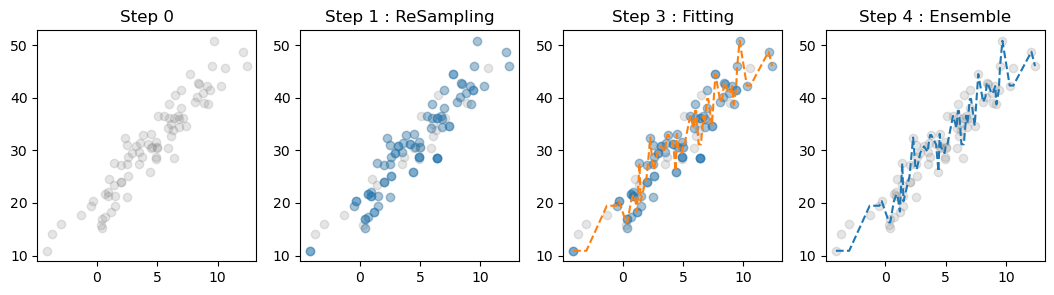

In [27]:
i = 0

fig, ax = plt.subplots(1,4, figsize = (13, 3))
## step 0 -- data import
ax[0].set_title('Step 0')
ax[0].plot(X, y, 'o', color = 'grey', alpha = 0.2)

## step 1 -- Resampling
ax[1].set_title('Step 1 : ReSampling')
ax[1].plot(X, y, 'o', color = 'grey', alpha = 0.2)
ax[1].plot(X_arr[samples[i]], y_arr[samples[i]], 'o', alpha = 0.3)

## step 2 -- fitting
ax[2].set_title('Step 3 : Fitting')
ax[2].plot(X, y, 'o', color = 'grey', alpha = 0.2)
ax[2].plot(X_arr[samples[i]], y_arr[samples[i]], 'o', alpha = 0.3)
ax[2].plot(X, trees[i].predict(X), '--')  ## 개별 tree의 적합

## step 3 -- ensemble
ax[3].set_title('Step 4 : Ensemble')
ax[3].plot(X, y, 'o', color = 'grey', alpha = 0.2)
ax[3].plot(X, ensemble(trees, i), '--')

* `Bagging`이 적합하는 과정 :

1. 자료를 받아온다.
2. 받아온 자료를 복원추출한다.
3. 복원추출한 자료를 의사결정나무로 적합한다.
4. 적합한 트리들의 개별 예측값들의 평균을 최종 예측값으로 제시한다.

`-` 애니메이션화

In [28]:
def func(i) :
    for a in ax:
        a.clear()

    ## step 0 -- data import
    ax[0].set_title('Step 0')
    ax[0].plot(X, y, 'o', color = 'grey', alpha = 0.2)

    ## step 1 -- Resampling
    ax[1].set_title('Step 1 : ReSampling')
    ax[1].plot(X, y, 'o', color = 'grey', alpha = 0.2)
    ax[1].plot(X_arr[samples[i]], y_arr[samples[i]], 'o', alpha = 0.3)
    
    ## step 2 -- fitting
    ax[2].set_title('Step 3 : Fitting')
    ax[2].plot(X, y, 'o', color = 'grey', alpha = 0.2)
    ax[2].plot(X_arr[samples[i]], y_arr[samples[i]], 'o', alpha = 0.3)
    ax[2].plot(X, trees[i].predict(X), '--')  ## 개별 tree의 적합
    
    ## step 3 -- ensemble
    ax[3].set_title('Step 4 : Ensemble')
    ax[3].plot(X, y, 'o', color = 'grey', alpha = 0.2)
    ax[3].plot(X, ensemble(trees, i), '--', color = 'C1')

In [29]:
ani = matplotlib.animation.FuncAnimation(
    fig,
    func,
    frames = len(predictr.estimators_features_)
)

display(IPython.display.HTML(ani.to_jshtml()))

> 최종 예측값에 관여하는 `tree`의 수가 많아질수록 예측값의 선이 완만해진다...

## 5. 어떻게 이런 생각을 했을까?

`# 모티브` : 끝자락의 예측값들을 조금 완만하게 만들고 싶었고, 이를 서로 다른 여러개의 tree를 만들어 해결하고자 하는데, 붓스트랩에서 영감을 받아 여러개의 트리를 만들었다.

`#` 오차까지 적합하려고 하는 의사결정나무의 작동방식을 완화하려고 했음.